Stargan 설치
Train StarGAN on our own dastaset -> create a folder structure in the same format as RAFD


In [ ]:
#StarGAN 설치
!git clone https://github.com/Nyounggu/stargan.git
%cd stargan

Cloning into 'stargan'...
remote: Enumerating objects: 183, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 183 (delta 8), reused 1 (delta 0), pack-reused 162
Receiving objects: 100% (183/183), 13.76 MiB | 1.89 MiB/s, done.
Resolving deltas: 100% (87/87), done.
/content/stargan


In [ ]:
#로컬 기기에 저장된 CT도메인 이미지와 MRI도메인 이미지를 불러와서 StarGAN훈련시킬 수 있는 데이터셋 디렉토리 구성
from google.colab import files
import zipfile
import os

# train용 CT 도메인 이미지 압축 파일 업로드
cttrain_uploaded = files.upload()
cttrain_zip_file_name = next(iter(cttrain_uploaded))

# test용 CT 도메인 이미지 압축 파일 업로드
cttest_uploaded = files.upload()
cttest_zip_file_name = next(iter(cttest_uploaded))

# train용 MRI 도메인 이미지 압축 파일 업로드
mritrain_uploaded = files.upload()
mritrain_zip_file_name = next(iter(mritrain_uploaded))

# test용 MRI 도메인 이미지 압축 파일 업로드
mritest_uploaded = files.upload()
mritest_zip_file_name = next(iter(mritest_uploaded))



Saving TRAIN_CT.zip to TRAIN_CT.zip


Saving TEST_CT.zip to TEST_CT.zip


Saving TRAIN_MRI.zip to TRAIN_MRI.zip


Saving TEST_MRI.zip to TEST_MRI.zip


In [ ]:

# 압축 파일을 푸는 함수 정의
def extract_zip(zip_file_path, extract_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# CT 데이터 압축 파일 풀기
extract_zip(cttrain_zip_file_name, 'data/RAFD0/train/CT')
extract_zip(cttest_zip_file_name, 'data/RAFD0/test/CT')

# MRI 데이터 압축 파일 풀기
extract_zip(mritrain_zip_file_name, 'data/RAFD0/train/MRI')
extract_zip(mritest_zip_file_name, 'data/RAFD0/test/MRI')

# 데이터셋 디렉토리 확인
cttrain_dir = 'data/RAFD0/train/CT'
cttest_dir = 'data/RAFD0/test/CT'
mritrain_dir = 'data/RAFD0/train/MRI'
mritest_dir = 'data/RAFD0/test/MRI'
print(f"train용 CT 데이터셋 경로: {cttrain_dir}")
print(f"test용 CT 데이터셋 경로: {cttest_dir}")
print(f"CT 데이터셋 경로: {mritrain_dir}")
print(f"MRI 데이터셋 경로: {mritest_dir}")


train용 CT 데이터셋 경로: data/RAFD0/train/CT
test용 CT 데이터셋 경로: data/RAFD0/test/CT
CT 데이터셋 경로: data/RAFD0/train/MRI
MRI 데이터셋 경로: data/RAFD0/test/MRI


In [ ]:
#CT, MRI 데이터 전처리 - 사이즈 조정
!pip install Pillow

from PIL import Image
import os

def resize_images_in_folder(folder_path, output_folder_path, target_size):
    # 만약 출력 경로가 존재하지 않으면 생성
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    # 폴더 내의 이미지 파일 목록 가져오기
    image_list = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    for img_name in image_list:
        img_path = os.path.join(folder_path, img_name)
        # 이미지 열기
        img = Image.open(img_path)
        # 이미지 크기 조정
        img_resized = img.resize((target_size, target_size), Image.ANTIALIAS)

        # 출력 경로에 이미지 저장
        output_img_path = os.path.join(output_folder_path, img_name)
        img_resized.save(output_img_path)

if __name__ == "__main__":
    # CT 데이터셋 폴더 경로
    cttrain_folder_path = "data/RAFD0/train/CT"
    # CT 이미지 크기 조정 후 저장할 폴더 경로
    cttrain_output_folder_path = "data/RaFD/train/CT"

        # CT 데이터셋 폴더 경로
    cttest_folder_path = "data/RAFD0/test/CT"
    # CT 이미지 크기 조정 후 저장할 폴더 경로
    cttest_output_folder_path = "data/RaFD/test/CT"

    # MRI 데이터셋 폴더 경로
    mritrain_folder_path = "data/RAFD0/train/MRI"
    # MRI 이미지 크기 조정 후 저장할 폴더 경로
    mritrain_output_folder_path = "data/RaFD/train/MRI"

    # MRI 데이터셋 폴더 경로
    mritest_folder_path = "data/RAFD0/test/MRI"
    # MRI 이미지 크기 조정 후 저장할 폴더 경로
    mritest_output_folder_path = "data/RaFD/test/MRI"

    # 대상 이미지 크기
    target_size = 128

    # CT 이미지 크기 조정
    resize_images_in_folder(cttrain_folder_path, cttrain_output_folder_path, target_size)

    resize_images_in_folder(cttest_folder_path, cttest_output_folder_path, target_size)

    # MRI 이미지 크기 조정
    resize_images_in_folder(mritrain_folder_path, mritrain_output_folder_path, target_size)

    resize_images_in_folder(mritest_folder_path, mritest_output_folder_path, target_size)


<ipython-input-4-5e4ae14d332d>:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize((target_size, target_size), Image.ANTIALIAS)


In [ ]:
# Train StarGAN on custom datasets
!python main.py --mode train --dataset RaFD --image_size 128 --c_dim 2 --model_save_dir stargan_custom/models --result_dir stargan_custom/results

# Test StarGAN on custom datasets
!python main.py --mode test --dataset RaFD --image_size 128 --c_dim 2 --model_save_dir stargan_custom/models --result_dir stargan_custom/results


Namespace(c_dim=2, c2_dim=8, celeba_crop_size=178, rafd_crop_size=256, image_size=128, g_conv_dim=64, d_conv_dim=64, g_repeat_num=6, d_repeat_num=6, lambda_cls=1, lambda_rec=10, lambda_gp=10, dataset='RaFD', batch_size=1, num_iters=10000, num_iters_decay=100000, g_lr=0.0001, d_lr=0.0001, n_critic=5, beta1=0.5, beta2=0.999, resume_iters=None, selected_attrs=['Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Male', 'Young'], test_iters=10000, num_workers=1, mode='train', use_tensorboard=True, celeba_image_dir='data/celeba/images', attr_path='data/celeba/list_attr_celeba.txt', rafd_image_dir='data/RaFD/train', log_dir='stargan/logs', model_save_dir='stargan_custom/models', sample_dir='stargan/samples', result_dir='stargan_custom/results', log_step=10, sample_step=1000, model_save_step=10000, lr_update_step=1000)
Generator(
  (main): Sequential(
    (0): Conv2d(5, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
    (1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=True, t



---



# MRI2CT 평가


In [ ]:
# 이미지 파일 불러오기
image1 = cv2.imread('/content/stargan/data/RaFD/train/MRI/069_103.500_(283, 152)_[34, 67, 316, 218]_MR2.16.840.1.114493.1.4.255.3.20221208112941060.jpg')
image2 = cv2.imread('/content/stargan/stargan_custom/results/280-images.jpg')

In [ ]:
import numpy as np
from PIL import Image

# 이미지를 numpy 배열로 읽어오기
img2_array = np.array(image2)

# 맨 오른쪽 128 픽셀 선택
selected_region = img2_array[:, -128:]

# 선택한 영역을 Image 객체로 변환
resized_img2 = Image.fromarray(selected_region)

# 선택한 영역을 원하는 크기로 리사이즈
resized_img2 = resized_img2.resize((128, 128), Image.ANTIALIAS)


<ipython-input-15-a5144bff17d4>:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img2 = resized_img2.resize((128, 128), Image.ANTIALIAS)


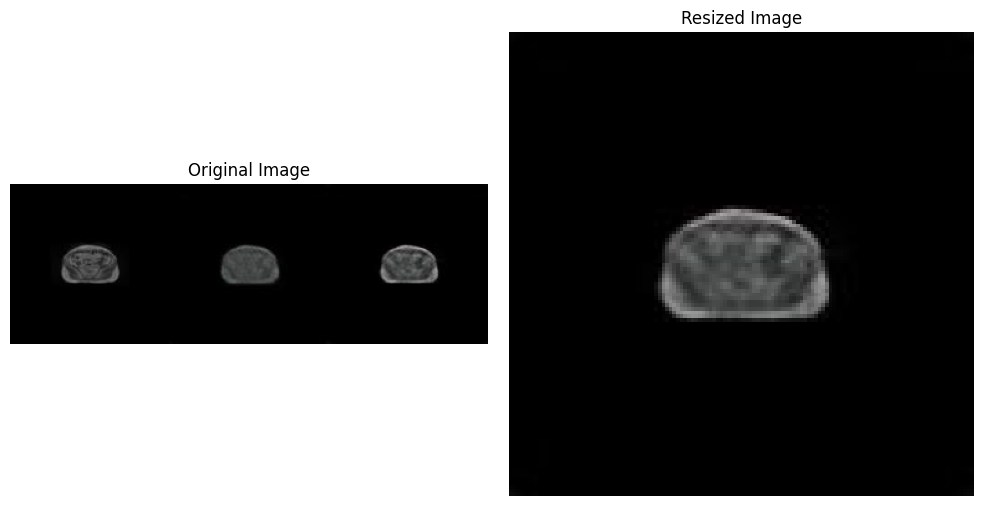

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image2)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(resized_img2)
axes[1].set_title('Resized Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
from skimage.metrics import structural_similarity as compare_ssim
import numpy as np

# 이미지를 NumPy 배열로 변환합니다.
image1_np = np.array(image1)
resized_img2_np = np.array(resized_img2)

def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# PSNR 계산
psnr_value = calculate_psnr(resized_img2, image1)

# SSIM 계산
ssim_value, _ = compare_ssim(resized_img2_np, image1_np, win_size=3, full=True)

print(f"PSNR: {psnr_value:.2f}")
print(f"SSIM: {ssim_value:.2f}")


PSNR: 32.15
SSIM: 0.53


##결과에 따르면 PSNR은 32.15, SSIM은 0.53으로 나왔습니다. 이 값들은 이미지 유사성을 측정하는 데 사용되는 지표입니다.

- PSNR은 이미지 간의 픽셀 값 차이를 측정하며, 값이 높을수록 이미지가 더 유사함을 의미합니다. 일반적으로 30 이상의 값은 높은 유사성을 나타냅니다. 따라서 32.15는 이미지가 상당히 유사하다는 것을 시사합니다.
  
- SSIM은 구조적 유사성 지표로, 밝기, 대비, 구조 등을 고려하여 이미지 간의 유사성을 측정합니다. 값이 1에 가까울수록 이미지가 유사함을 나타내며, 0.53은 상대적으로 중간 수준의 유사성을 보여줍니다.

이러한 결과를 기반으로 이미지가 높은 PSNR을 가지고 있지만, SSIM 값은 중간 정도로 유사하다고 해석할 수 있습니다. 다만, 이미지 유사성을 평가하는데는 여러 가지 요소가 있기 때문에, 다른 지표나 시각적으로 이미지를 비교하는 것도 도움이 될 수 있습니다.


#CT2MRI 평가

In [ ]:
# 이미지 파일 불러오기
image1 = cv2.imread('/content/stargan/data/RaFD/train/CT/069_103.500_(283, 152)_[34, 67, 316, 218]_CT2.16.840.1.114493.1.4.255.6.20230601113450530.jpg')
image2 = cv2.imread('/content/stargan/stargan_custom/results/140-images.jpg')

In [ ]:
import numpy as np
from PIL import Image

# 이미지의 중앙 128 픽셀 선택
center_x = img2_array.shape[1] // 2  # 이미지의 가로 중심
selected_region = img2_array[:, center_x - 64 : center_x + 64]  # 중앙 128 픽셀 선택

# 선택한 영역을 Image 객체로 변환
resized_img2 = Image.fromarray(selected_region)

# 선택한 영역을 원하는 크기로 리사이즈
resized_img2 = resized_img2.resize((128, 128), Image.ANTIALIAS)



<ipython-input-34-0da1d2b5d221>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img2 = resized_img2.resize((128, 128), Image.ANTIALIAS)


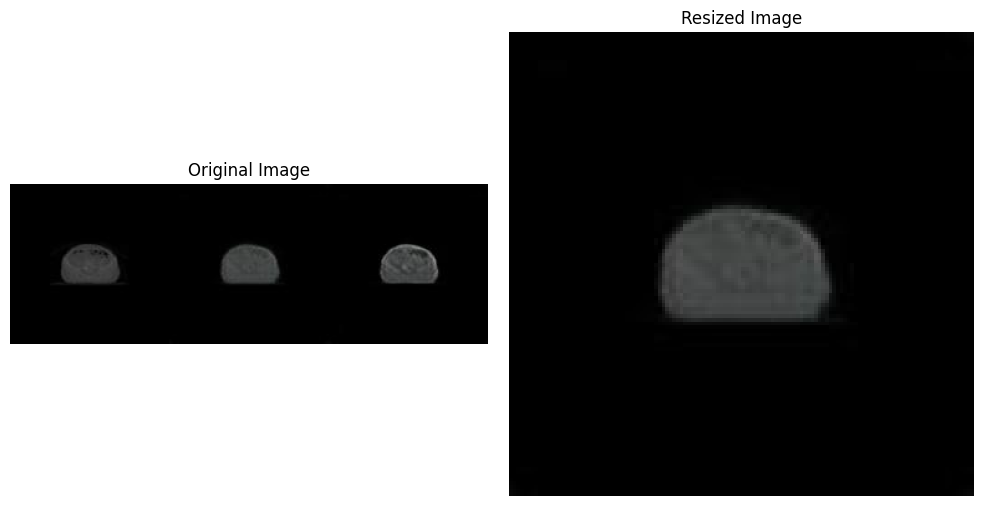

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image2)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(resized_img2)
axes[1].set_title('Resized Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
from skimage.metrics import structural_similarity as compare_ssim
import numpy as np

# 이미지를 NumPy 배열로 변환합니다.
image1_np = np.array(image1)
resized_img2_np = np.array(resized_img2)

def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# PSNR 계산
psnr_value = calculate_psnr(resized_img2, image1)

# SSIM 계산
ssim_value, _ = compare_ssim(resized_img2_np, image1_np, win_size=3, full=True)

print(f"PSNR: {psnr_value:.2f}")
print(f"SSIM: {ssim_value:.2f}")


PSNR: 32.74
SSIM: 0.60


##결과에 따르면 PSNR은 32.74, SSIM은 0.60으로 나왔습니다. 이 값들은 이미지 유사성을 측정하는 데 사용되는 지표입니다.

- PSNR은 이미지 간의 픽셀 값 차이를 측정하며, 값이 높을수록 이미지가 더 유사함을 의미합니다. 일반적으로 30 이상의 값은 높은 유사성을 나타냅니다. 따라서 32.74는 이미지가 상당히 유사하다는 것을 시사합니다.
  
- SSIM은 구조적 유사성 지표로, 밝기, 대비, 구조 등을 고려하여 이미지 간의 유사성을 측정합니다. 값이 1에 가까울수록 이미지가 유사함을 나타내며, 0.60은 상대적으로 중간 수준의 유사성을 보여줍니다.

이러한 결과를 기반으로 이미지가 높은 PSNR을 가지고 있지만, SSIM 값은 중간 정도로 유사하다고 해석할 수 있습니다. 다만, 이미지 유사성을 평가하는데는 여러 가지 요소가 있기 때문에, 다른 지표나 시각적으로 이미지를 비교하는 것도 도움이 될 수 있습니다.
